In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [2]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [3]:
df = pd.read_csv("exoplanet_data.csv")

df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 0 to 9540
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              2269 non-null   int64  
 1   kepid              2269 non-null   int64  
 2   kepoi_name         2269 non-null   object 
 3   kepler_name        2269 non-null   object 
 4   koi_disposition    2269 non-null   object 
 5   koi_pdisposition   2269 non-null   object 
 6   koi_score          2269 non-null   float64
 7   koi_fpflag_nt      2269 non-null   int64  
 8   koi_fpflag_ss      2269 non-null   int64  
 9   koi_fpflag_co      2269 non-null   int64  
 10  koi_fpflag_ec      2269 non-null   int64  
 11  koi_period         2269 non-null   float64
 12  koi_period_err1    2269 non-null   float64
 13  koi_period_err2    2269 non-null   float64
 14  koi_time0bk        2269 non-null   float64
 15  koi_time0bk_err1   2269 non-null   float64
 16  koi_time0bk_err2   2269 

# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
selected_features = df.drop(columns={'koi_disposition'})

selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
target = df['koi_disposition']
target_names = ['CONFIRMED','FALSE POSITIVE','CANDIDATE']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, random_state=42)

In [8]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Train the Model



##### DecisionTreeClassifier

In [10]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier()
model1 = model1.fit(X_train_scaled, y_train)
#clf.score(X_test, y_test)

In [11]:
print(f"Training Data Score: {model1.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model1.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.7282608695652174


#### RandomForestClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100)
model2 = model2.fit(X_train_scaled, y_train)
model2.score(X_test_scaled, y_test)

0.8346681922196796

In [13]:
sorted(zip(model2.feature_importances_, selected_features), reverse=True)

[(0.10834176853511046, 'koi_fpflag_co'),
 (0.09898491892521122, 'koi_fpflag_nt'),
 (0.0688915027502794, 'koi_fpflag_ss'),
 (0.05338631845853495, 'koi_model_snr'),
 (0.04531752948785028, 'koi_prad'),
 (0.03629278749592332, 'koi_duration_err2'),
 (0.0355544835080235, 'koi_prad_err1'),
 (0.03468040569344916, 'koi_duration_err1'),
 (0.034181385537133215, 'koi_fpflag_ec'),
 (0.030910863886521634, 'koi_steff_err2'),
 (0.027510334007885592, 'koi_steff_err1'),
 (0.02608665328045268, 'koi_time0bk_err2'),
 (0.023024860392894548, 'koi_prad_err2'),
 (0.02252811972292168, 'koi_period'),
 (0.022077030082884218, 'koi_duration'),
 (0.021164999372917416, 'koi_time0bk_err1'),
 (0.019933440449184662, 'koi_period_err2'),
 (0.01987009648381157, 'koi_period_err1'),
 (0.01920149719736771, 'koi_depth'),
 (0.017483003494083094, 'koi_insol_err1'),
 (0.017414354630410068, 'koi_impact'),
 (0.01504108515897475, 'koi_depth_err2'),
 (0.01482115900832661, 'koi_teq'),
 (0.014719023379452436, 'koi_depth_err1'),
 (0.014

#### KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.800
k: 3, Train/Test Score: 0.897/0.814
k: 5, Train/Test Score: 0.878/0.811
k: 7, Train/Test Score: 0.866/0.815
k: 9, Train/Test Score: 0.856/0.819
k: 11, Train/Test Score: 0.848/0.820
k: 13, Train/Test Score: 0.849/0.815
k: 15, Train/Test Score: 0.841/0.820
k: 17, Train/Test Score: 0.838/0.819
k: 19, Train/Test Score: 0.836/0.819


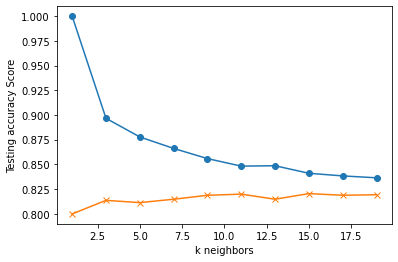

In [16]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.819


#### SVC model

In [19]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model4 = SVC(kernel ='linear')
model4.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [20]:
print('Test Acc: %.3f' % model4.score(X_test, y_test))

Test Acc: 0.429


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [26]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model4, param_grid, verbose=3)

In [27]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.858, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.833, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.855, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.832, total=   0.7s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.835, total=   0.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.858, total=   0.7s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.833, total=   0.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.855, total=   0.7s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.832, total=   0.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[CV] .................. C=50, gamma=0.0001, score=0.896, total=   1.0s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.879, total=   1.0s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.891, total=   1.1s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.872, total=   0.9s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.873, total=   1.0s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.896, total=   1.0s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.879, total=   1.0s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.1min finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [29]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.0001}
0.8823155822702828


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)